## AccelerateAI Data Science Global Bootcamp

### Model Selection Methods

we will look at an example of finding the Optimal number of cluster for K-Means using BIC.

In [1]:
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(-BIC)

In [3]:
#Iris data from sklearn
iris = sklearn.datasets.load_iris()

X = iris.data[:, :4]  # extract only the features
Y = iris.target

In [4]:
ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, '# BIC')

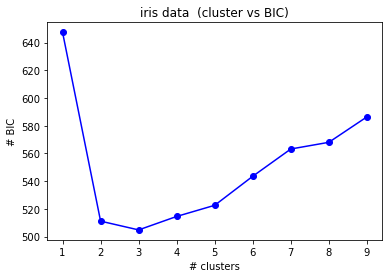

In [5]:
import matplotlib.pyplot as plt

plt.plot(ks,BIC,'b-o')
plt.title("iris data  (cluster vs BIC)")
plt.xlabel("# clusters")
plt.ylabel("# BIC")

### The optimal number of clusters is 3 

***